🎯 **Aim of the Project**

The aim of this project is to segment customers into distinct groups based on their demographic features and spending behavior using the K-Means Clustering algorithm.





In [1]:
#Import Essestial Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

## Data Collection and Analysis

In [2]:
#loading the data from csv file to a pandas dataframe
customer_data = pd.read_csv('/content/sample_data/Mall_Customers.csv')

In [3]:
#first five rows of dataframe
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
#number of data points & number of features
customer_data.shape

(200, 5)

In [5]:
# getting some information about the datasset
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
# checking for missing values
customer_data.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


No missing values found in the dataset, so no Data cleaning and preprocessing is required.

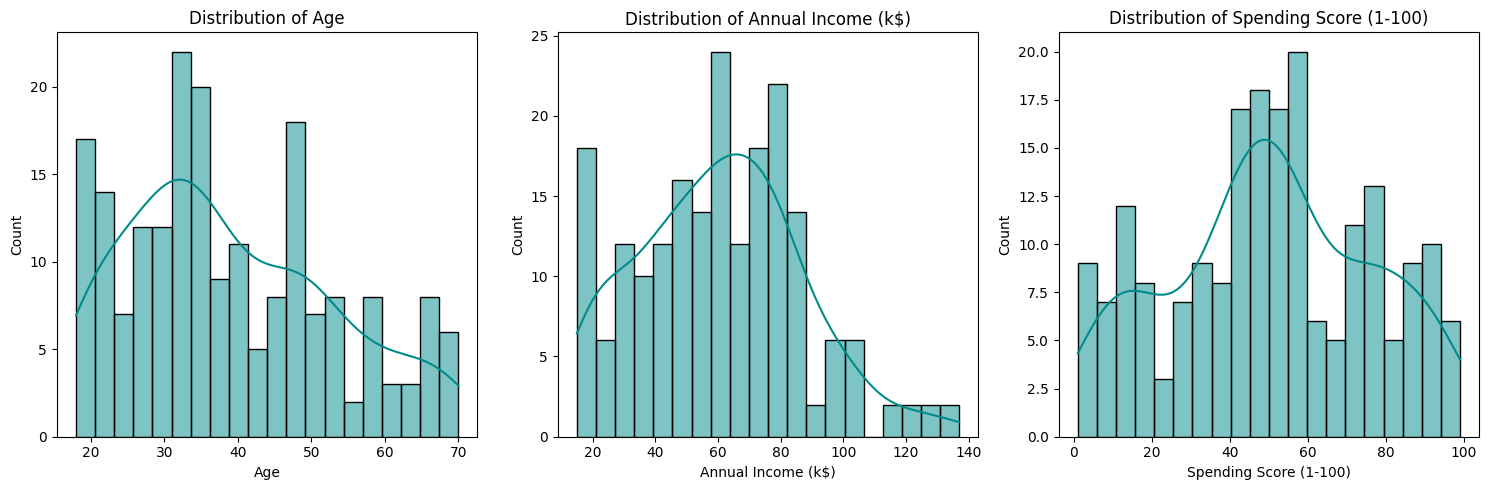

In [7]:
#charts to show how the values of Age, Annual Income, and Spending Score are spread out among all customers in the dataset.

# Set up the matplotlib figure
plt.figure(figsize=(15, 5))

# List of features to plot
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# Create histograms
for i, feature in enumerate(features):
    plt.subplot(1, 3, i+1)
    sns.histplot(customer_data[feature], bins=20, color='darkcyan', kde=True)
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()


📊 **1. Age Distribution**

The majority of customers are between 30 and 40 years old.

There is also a noticeable group in the 18–25 age range.

The age distribution is slightly skewed to the right, meaning there are fewer older customers.

💰 **2. Annual Income Distribution**

Most customers earn between \$40k and \$80k annually.

The income range peaks around $60k.

Overall, the income distribution is right-skewed, showing a concentration in middle income.

🛍️ **3. Spending Score Distribution**

This distribution is more even and varied compared to age and income.

Many customers have medium spending scores (around 40–60), but:

There are also significant numbers of customers with low (0–20) and high (80–100) scores.

This suggests distinct types of spenders — some spend a lot, some very little, and others are average.

## Choosing the Annual Income Column & Spending Score column

In [8]:
#taking 3rd and 4th column from dataframe
X = customer_data.iloc[:,[3,4]].values
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

## *Find the Optimal Number of Clusters* By using Elbow Method

In [9]:
# WCSS -> Within Clusters Sum of Squares

# finding wcss value for different number of clusters
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

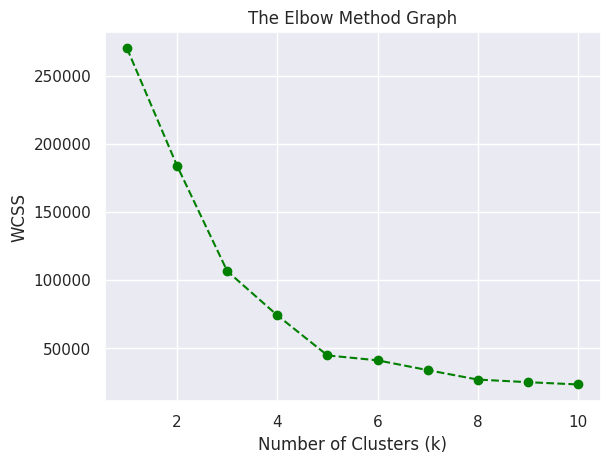

In [10]:
#Plot the Elbow graph
sns.set()
plt.plot(range(1,11), wcss ,marker='o', linestyle='--', color='green')
plt.title('The Elbow Method Graph')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()

The Elbow Method graph shows that the **best number of clusters is 5**. After 5, the improvement in grouping customers becomes smaller (or there is no insignificant sharp drop) , so 5 is a good choice to divide the customers into meaningful groups.

## Training the k-Means Clustering model

In [11]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

#return a label for each data point based on their cluster
clusters = kmeans.fit_predict(X)
print(clusters)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


## Visualizing the clusters!

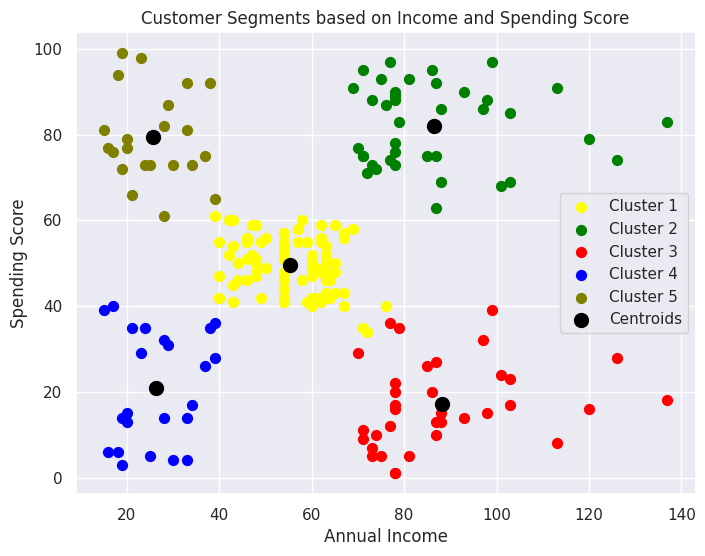

In [12]:
# plotting all the clusters and their centroids
plt.figure(figsize=(8,6))
plt.scatter(X[clusters==0,0],X[clusters==0,1], s=50, c='yellow', label='Cluster 1')
plt.scatter(X[clusters==1,0],X[clusters==1,1], s=50, c='green', label='Cluster 2')
plt.scatter(X[clusters==2,0],X[clusters==2,1], s=50, c='red', label='Cluster 3')
plt.scatter(X[clusters==3,0],X[clusters==3,1], s=50, c='blue', label='Cluster 4')
plt.scatter(X[clusters==4,0],X[clusters==4,1], s=50, c='olive', label='Cluster 5')

# plotting the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='black', label='Centroids')

plt.title('Customer Segments based on Income and Spending Score')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

💡 **Insights from Customer Segmentation:**


**Cluster 1 (Light Yellow):**

**Average income** and **average spending score**.

Represents balanced customers—neither frugal nor extravagant.


**Cluster 2 (Green):**

**High income** and **high spending score**.

Likely high-value customers — ideal targets for premium offers.

**Cluster 3 (Red):**

**High income**, but **low spending score**.

Potential opportunity — maybe they need better engagement or offers.

**Cluster 4 (Blue):**

**Low income** and **low spending score**.

Less profitable segment — may not respond well to high-end marketing.

**Cluster 5 (olive):**

**Low income**, but **high spending score**.

These are value-conscious and loyal spenders — worth nurturing.